In [1]:
#############################
# IMPORTS
#############################
# SYSTEM LEVEL IMPORTS
# Import files from other directories
import sys

# THIRD-PARTY IMPORTS
# For array handling
import numpy as np
import matplotlib.pyplot as plt

# LOCAL IMPORTS
# Linear regression codes
from LinearRegression import LinearRegressionAnalysis
# Ridge regression codes
from RidgeRegression import RidgeRegressionAnalysis
# Kernel ridge regression codes
from KernelRidgeRegression import KernelRidgeRegressionAnalysis
# Support methods, including graphing capabilities
from RegressionSupport import *
# Changing the import directory
sys.path.append('../DataSets/')
# Data sets (mostly physics related)
from DataSets import *
from ElectronGas import *
from NuclearBindingEnergy import *
from EquationOfState import *

/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X_tot, y_tot, design_matrix = EquationOfState()
print(len(X_tot))
training_dim = 45

90


In [19]:
X_train, y_train = time_series_data (y_tot[:training_dim], 2)

ValueError: x and y must have same first dimension, but have shapes (86,) and (43,)

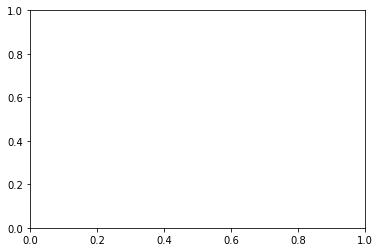

In [20]:
plt.plot(X_train.flatten(), y_train)

In [21]:
#############################
# LINEAR REGRESSION PARAMETERS
#############################
# Possible values of parameters for the linear regression algorithm
params_list_lr = [[True, False], [True, False]]


#############################
# RIDGE REGRESSION PARAMETERS
#############################
# Possible values of parameters for the ridge regression algorithm
normalizes = [True, False]
solvers= ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alphas = np.logspace(-50, 0, 500)
params_list_rr = [normalizes, alphas, solvers]

#############################
# KERNEL RIDGE REGRESSION PARAMETERS
#############################
# Possible values of parameters for the kernel ridge regression algorithm
kernels = ['polynomial', 'sigmoid']
degrees = [6/3, 5/3, 4/3, 3/3, 2/3, 1/3]
alphas = np.logspace(-5, 0, 50)
coef0s = [0, 1, 2, 3, 4]
gammas = np.logspace(-5, 0, 40)
params_list_krr = [kernels, degrees, alphas, coef0s, gammas]

In [22]:
lr = KernelRegressionAnalysis()

Linear Regression instance started.


In [24]:
best_models = lr.tune_serial_seq (params_list_krr, X_train, y_train, training_dim, y_tot,
        verbose=True, isReturnBest = True, threshold = 0)
# Save the best extrapolated data set and extrapolated error to variables
# to be used later
data = best_models[2]
score = best_models[0]
print(score)

BEST LINEAR REGRESSION SCORE:  123022.89200572406
BEST LINEAR REGRESSION PARAMETERS:  ('polynomial', 2.0)
123022.89200572406


In [17]:
print('****************************************')
print(score)

****************************************
10000000000.0


In [11]:
print(best_models[1])

(True, 1e-50, 'auto')


ValueError: x, y, and format string must not be None

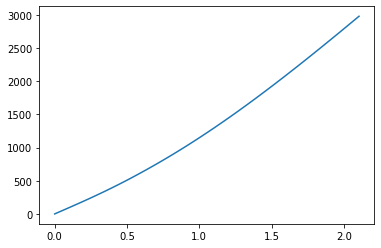

In [12]:
plt.plot(X_tot, y_tot, label='actual')
plt.plot(X_tot, data, label='predicted')
plt.legend(loc='best')

In [ ]:
print(score/y_tot[-1])

In [ ]:
('polynomial', 1.3333333333333333, 0.029470517025518096, 3, 0.0003727593720314938)

In [ ]:
ratio score: 0.002371279714439891

In [ ]:
params = ['polynomial', 1.3333333333333333, 0.029470517025518096, 3, 0.0003727593720314938]
training_dim = 45

y_new, mse_new = lr.known_data_seq (X_train, y_train, y_tot, training_dim, params, verbose=True, seq=2)

print(mse_new/y_tot[-1])

plt.plot(X_tot, y_new)
plt.plot(X_tot, y_tot)

In [3]:
X_test, y_test = time_series_data (y_tot, 1)

X_test = X_test.flatten()

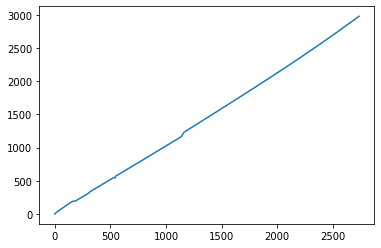

In [5]:
plt.plot(X_test, y_test)